# Regression of possum dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import klib as k
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv('possum.csv')

In [3]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
data.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [5]:
data.sample()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
58,59,4,other,m,2.0,102.5,62.8,96.0,40.0,73.2,44.5,14.7,32.0,36.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [7]:
data.shape

(104, 14)

In [8]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [9]:
data.age.fillna(data.age.mean(),inplace=True)
data.footlgth.fillna(data.footlgth.mean(),inplace=True)

In [10]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [11]:
data.duplicated().sum()

0

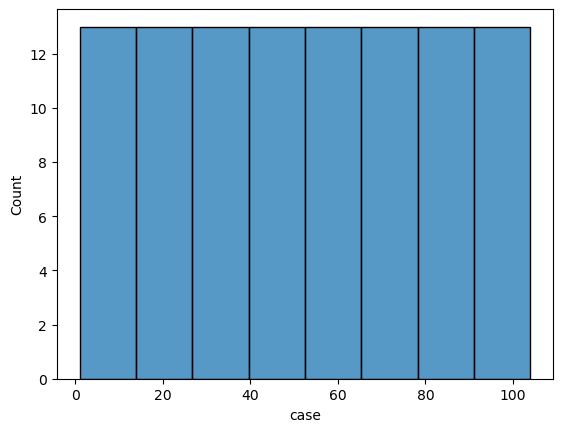

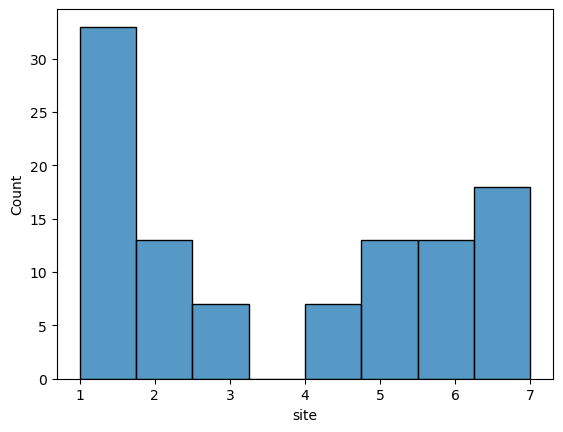

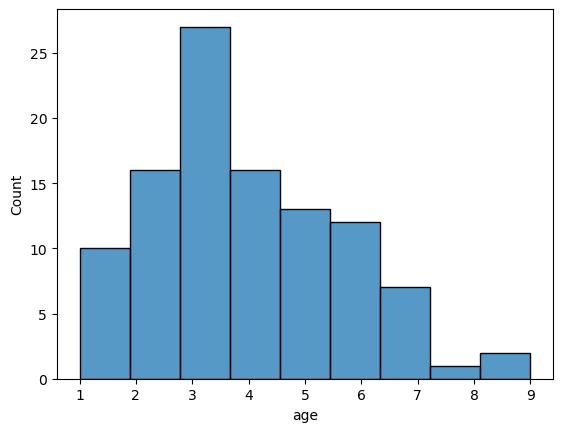

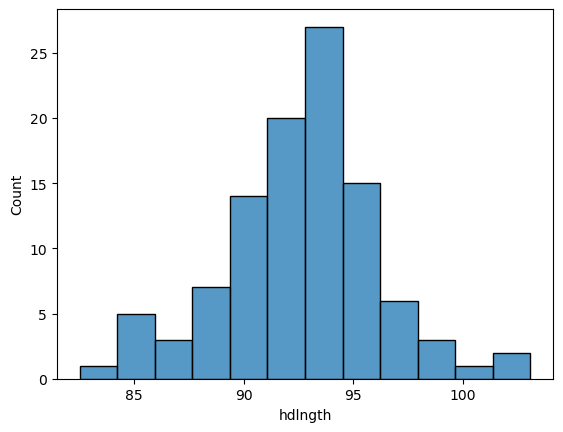

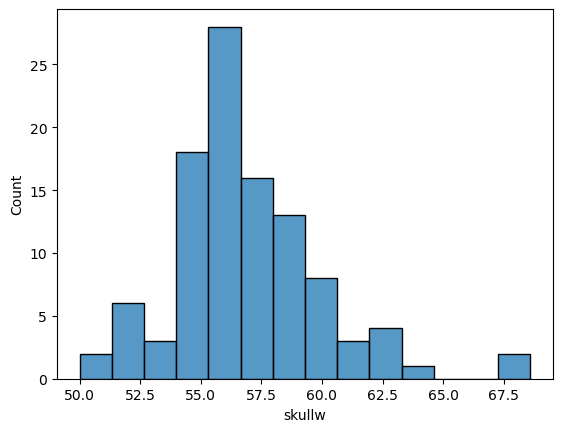

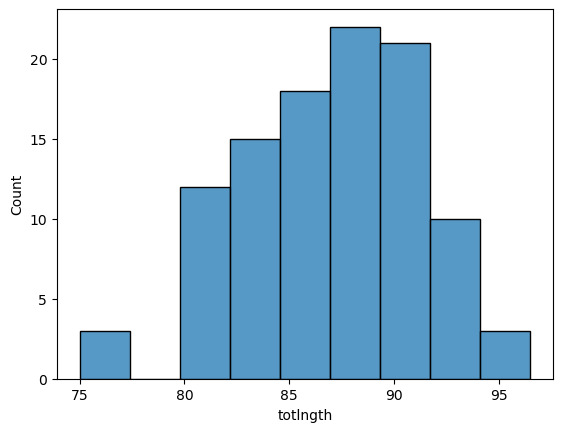

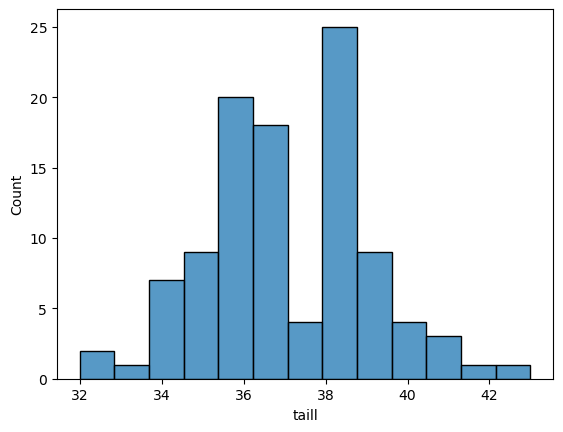

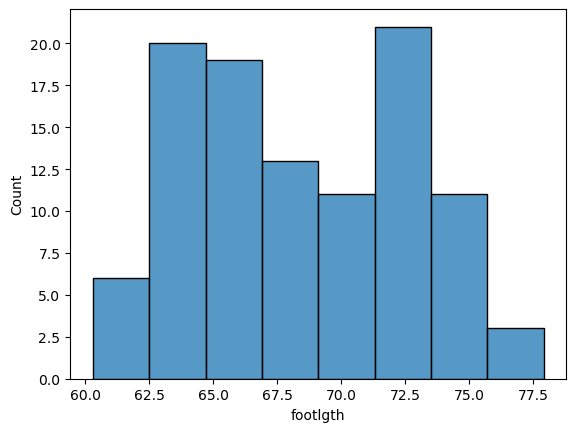

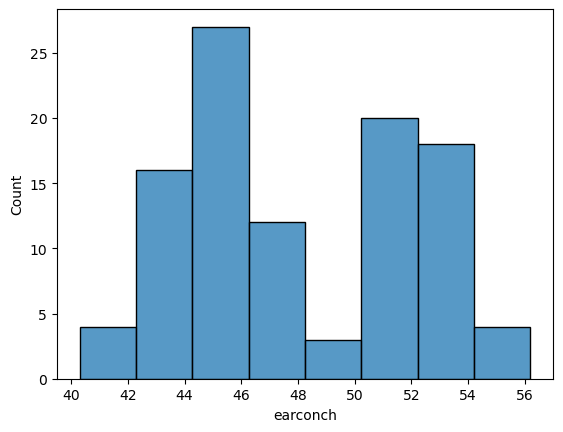

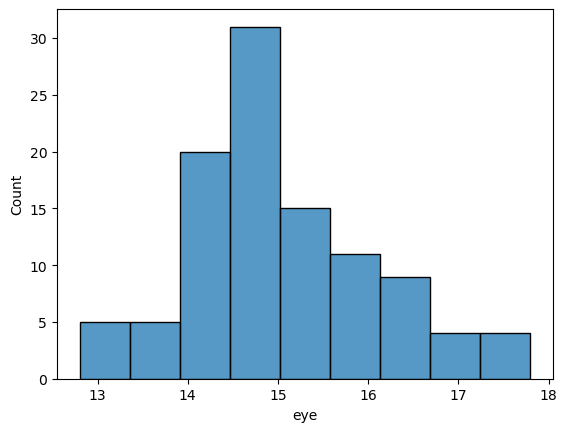

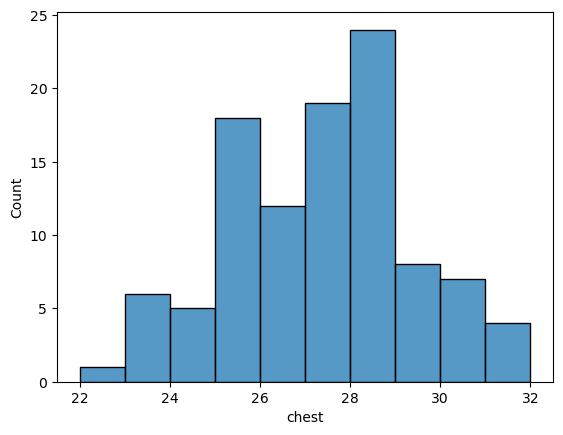

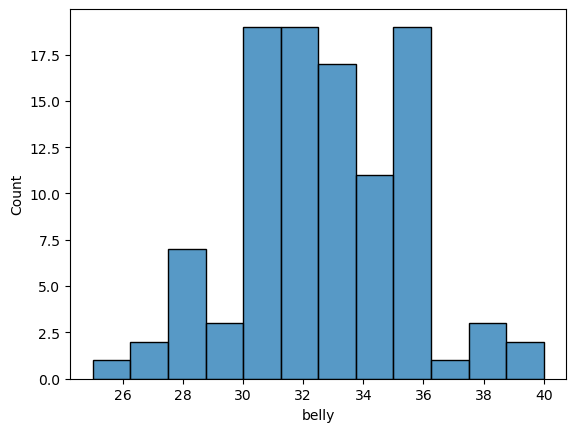

In [12]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.histplot(x=data[i])
        plt.show()

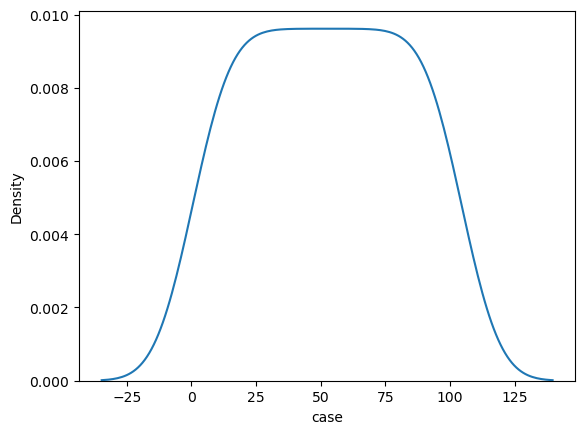

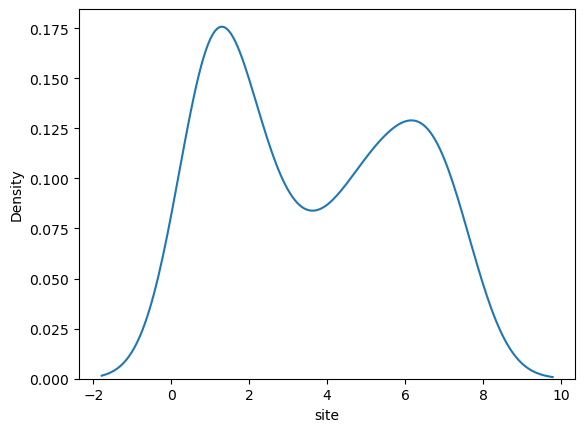

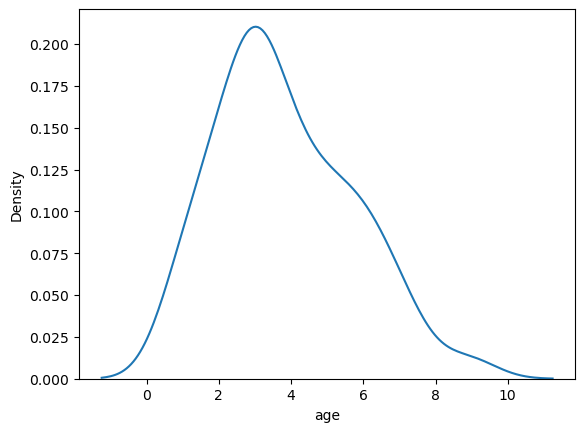

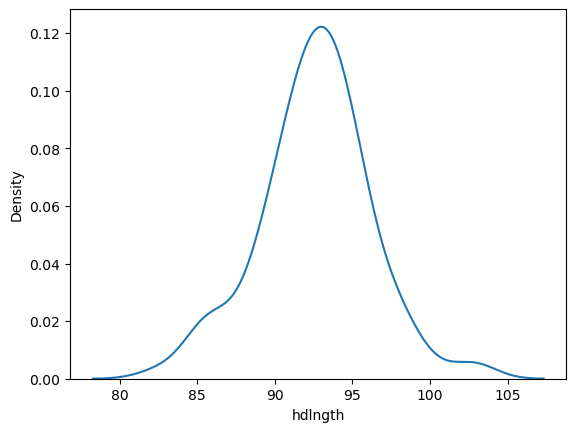

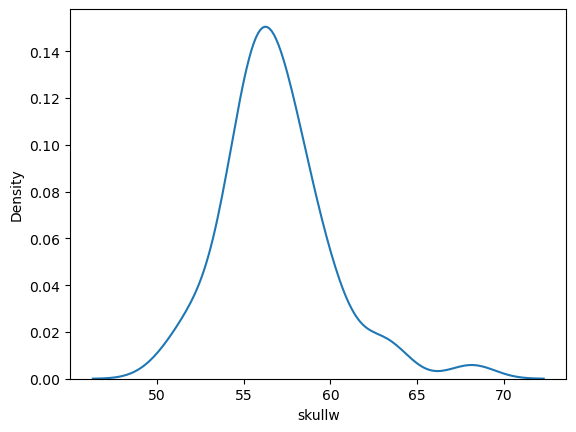

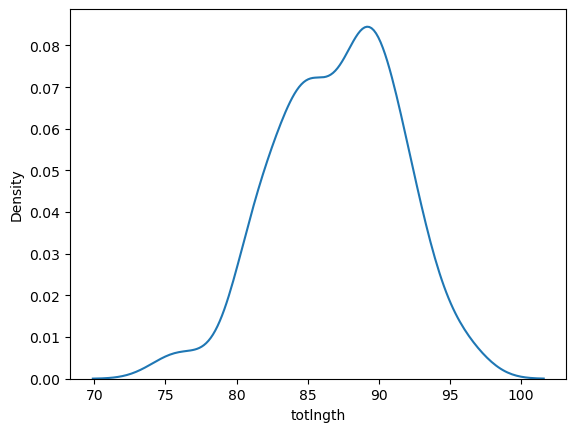

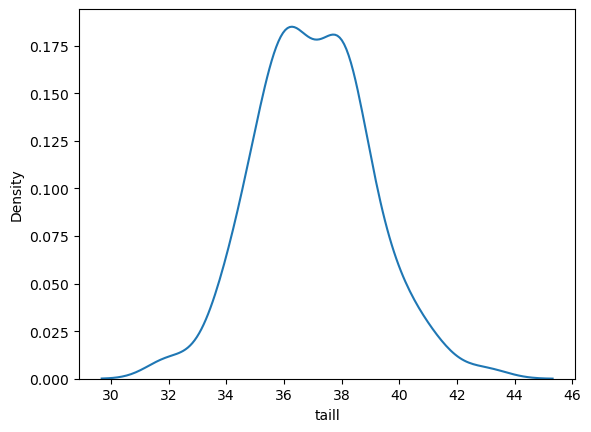

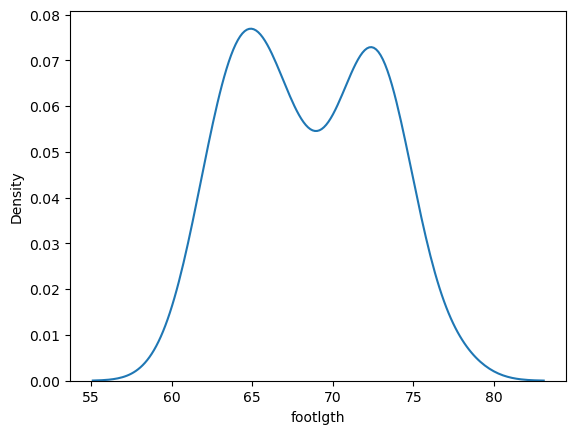

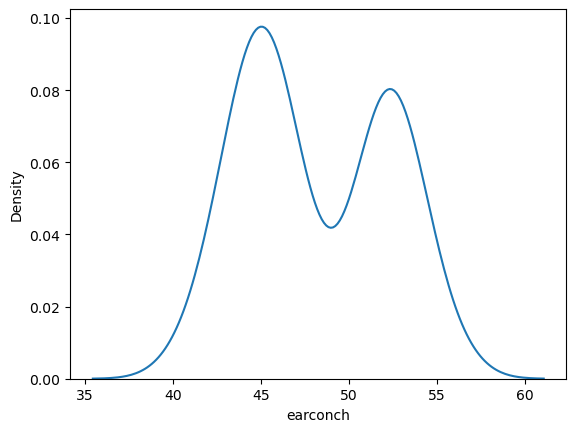

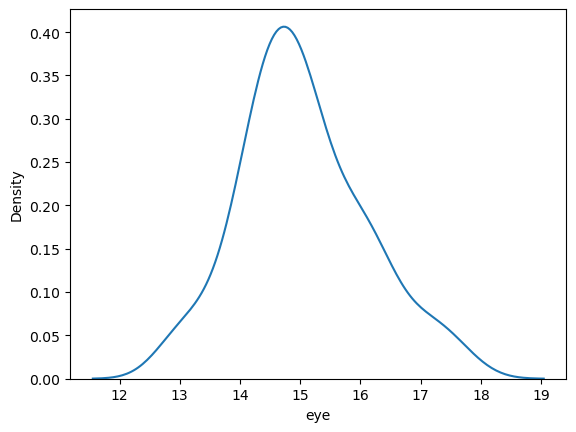

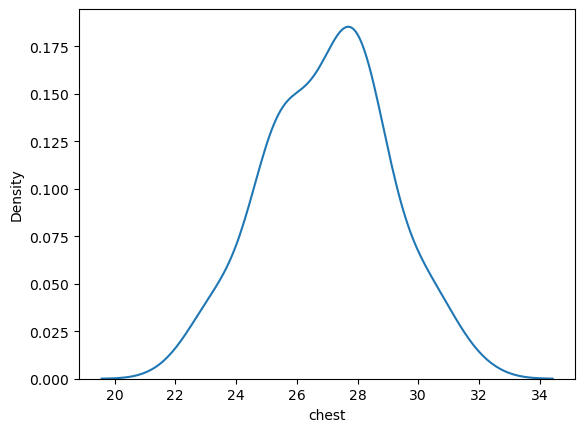

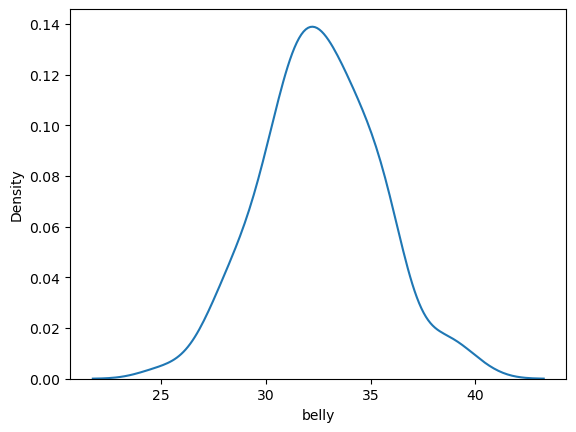

In [13]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.kdeplot(x=data[i])
        plt.show()

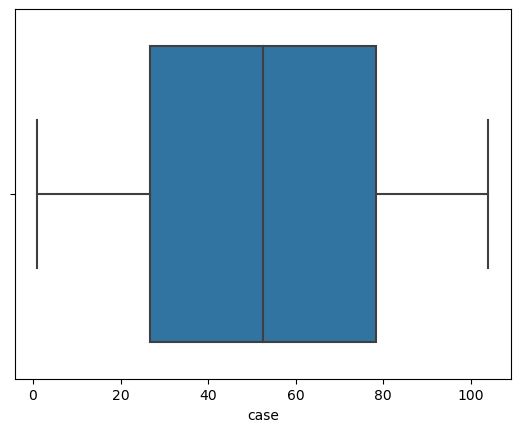

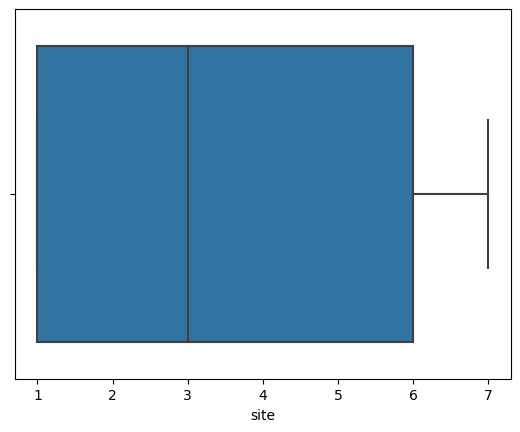

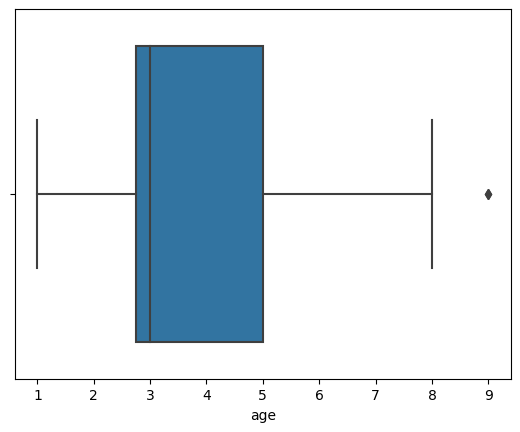

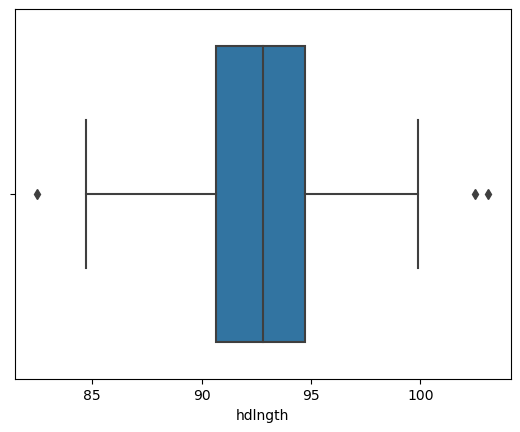

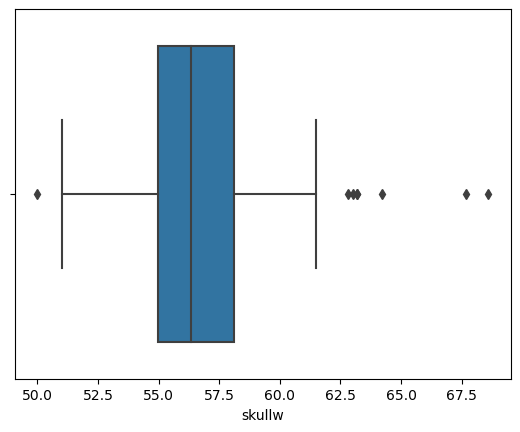

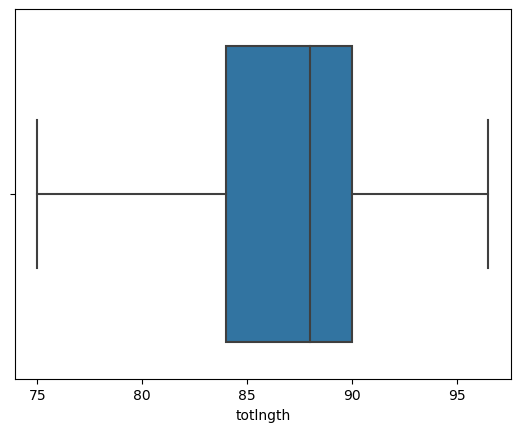

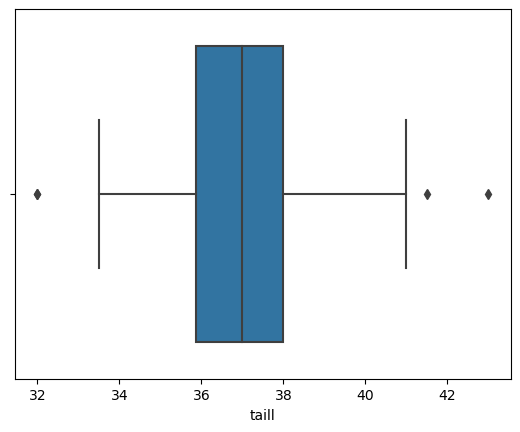

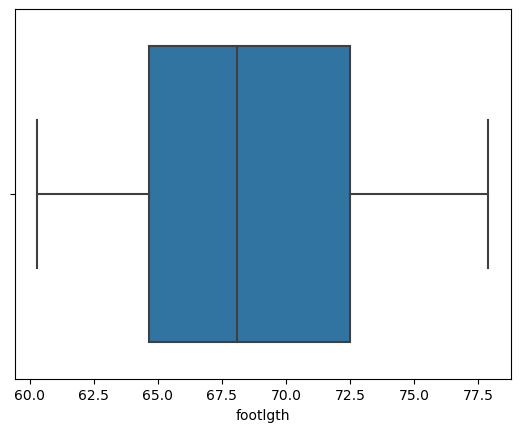

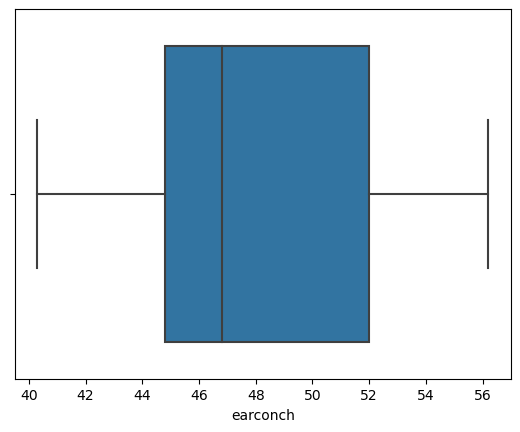

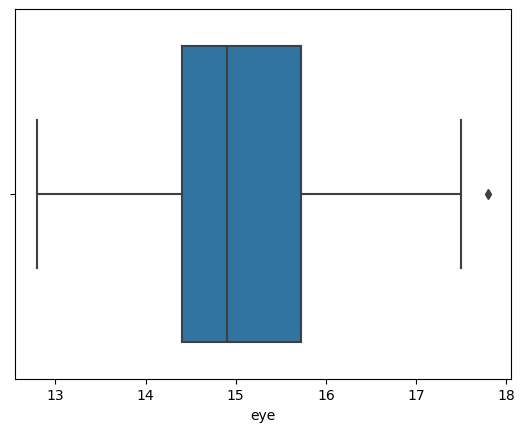

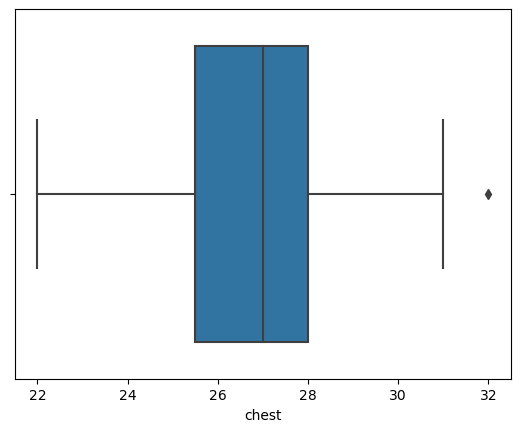

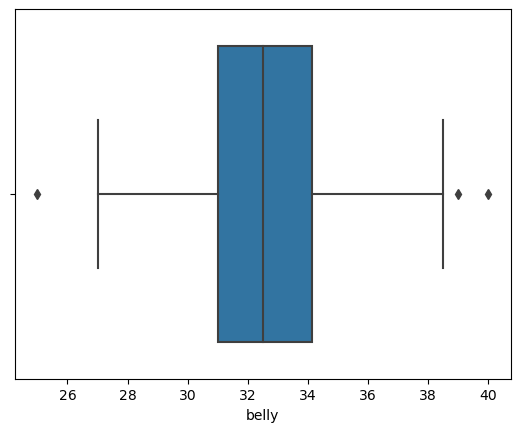

In [14]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(x=data[i])
        plt.show()

In [15]:
le=LabelEncoder()

In [16]:
data['Pop']=le.fit_transform(data['Pop'])

In [17]:
data['sex']=le.fit_transform(data['sex'])

In [18]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


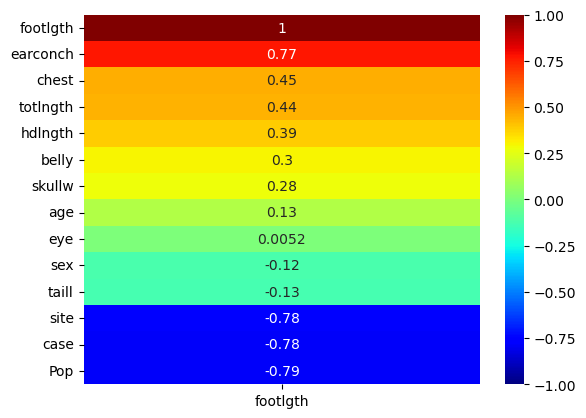

In [19]:
sns.heatmap(data.corr()[["footlgth"]].sort_values(by="footlgth",ascending=False),vmin=-1,vmax=1,annot=True,cmap='jet');

In [20]:
x= data[[ 'hdlngth', 'skullw', 'totlngth','earconch', 'chest', 'belly']].values

In [21]:
y=data[['footlgth']].values

In [22]:
rs = RobustScaler()
x=rs.fit_transform(x)

In [23]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [24]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  2.3419491911763948
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  2.351457185012257
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  4.407128783325262
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  2.901792615620642
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  2.43017911164453
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  2.3592626204956497
***********************************************

In [27]:
model=RandomForestRegressor()
model.fit(x,y)


RandomForestRegressor()

In [28]:
y_pred=model.predict(x)

In [29]:
OUTPUT=pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTION"),dtype=float)

In [30]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,74.5,74.038
1,72.5,72.330
2,75.4,75.482
3,76.1,74.880
4,71.0,71.522


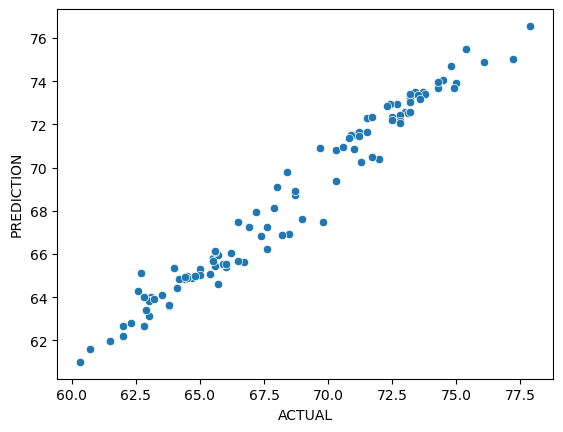

In [31]:
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTION");